# 1. Introduction 

In [1]:
# Import de toutes les librairies nécessaires au projet
import pandas as pd
import numpy as np
import time
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Pré-requis pyarrow : avoir installé la librairie, voir https://arrow.apache.org/docs/python/index.html
# Faire par exemple : pip install pyarrow
from pyarrow import csv

In [2]:
# Pré-requis : avoir téléchargé le dataset et l'avoir mis dans le même répertoire que le notebook
MyCSVFile = 'DataExtract.csv'
MyCSVDelimiter = ','

# Nous avons retenu le chargement avec pyarrow, plus rapide que l'import classique Pandas
def csv_file_2_dataframe(csv_file_path: str, csv_delimiter: str) -> pd.DataFrame:
    return csv.read_csv(csv_file_path, parse_options=csv.ParseOptions(delimiter=csv_delimiter)).to_pandas()

start_time = time.time()
df = csv_file_2_dataframe(MyCSVFile, MyCSVDelimiter)
print("Temps de chargement : "+format(time.time() - start_time))

Temps de chargement : 20.360417127609253


In [3]:
# Vérification du chargement
print('Dimensions dataset : ', df.shape)
pd.set_option('display.max_columns', None)
df.head()

Dimensions dataset :  (11742439, 39)


,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,Ve,Mk,Cn,Ct,Cr,M (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,Ec (cm3),Ep (KW),Z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,R,Year,Status,Version_file,E (g/km),Er (g/km),Zr
0,8393605,DE,VW-SAIC,IP-MQB48ZZ_A2_0327-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0307*61,3C,ACDSRBX0,FD7FD7GC004SV4BFVR21AA,VOLKSWAGEN VW,PASSAT,M1,M1,1590.0,1718.0,105.0,135.0,2786.0,1564.0,1578.0,DIESEL,M,1968.0,110.0,NaN,,NaN,NaN,NaN,NaN,1,2020,F,v22,None,None,NaN
1,8393887,DE,VW-SAIC,IP-MQB48ZZ_A2_0327-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0307*61,3C,ACDSRBX0,FD7FD7GC004SV4BFVR21AA,VOLKSWAGEN VW,PASSAT,M1,M1,1590.0,1732.0,105.0,135.0,2786.0,1564.0,1578.0,DIESEL,M,1968.0,110.0,NaN,,NaN,NaN,NaN,NaN,1,2020,F,v22,None,None,NaN
2,8393886,DE,VW-SAIC,IP-MQB48ZZ_A2_0327-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0307*61,3C,ACDSRBX0,FD7FD7GC004SV4BFVR21AA,VOLKSWAGEN VW,PASSAT,M1,M1,1590.0,1745.0,105.0,135.0,2786.0,1564.0,1578.0,DIESEL,M,1968.0,110.0,NaN,,NaN,NaN,NaN,NaN,1,2020,F,v22,None,None,NaN
3,8393878,DE,VW-SAIC,IP-MQB48ZZ_A2_0327-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0307*61,3C,ACDSRBX0,FD7FD7GC004SV4BFVR21AA,VOLKSWAGEN VW,PASSAT,M1,M1,1590.0,1737.0,105.0,135.0,2786.0,1564.0,1578.0,DIESEL,M,1968.0,110.0,NaN,,NaN,NaN,NaN,NaN,1,2020,F,v22,None,None,NaN
4,8393875,DE,VW-SAIC,IP-MQB48ZZ_A2_0327-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0307*61,3C,ACDSRBX0,FD7FD7GC004SV4BFVR21AA,VOLKSWAGEN VW,PASSAT,M1,M1,1590.0,1723.0,105.0,135.0,2786.0,1564.0,1578.0,DIESEL,M,1968.0,110.0,NaN,,NaN,NaN,NaN,NaN,1,2020,F,v22,None,None,NaN


# 2. Exploration : descriptif des variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11742439 entries, 0 to 11742438
Data columns (total 39 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             int64  
 1   MS             object 
 2   Mp             object 
 3   VFN            object 
 4   Mh             object 
 5   Man            object 
 6   MMS            object 
 7   TAN            object 
 8   T              object 
 9   Va             object 
 10  Ve             object 
 11  Mk             object 
 12  Cn             object 
 13  Ct             object 
 14  Cr             object 
 15  M (kg)         float64
 16  Mt             float64
 17  Enedc (g/km)   float64
 18  Ewltp (g/km)   float64
 19  W (mm)         float64
 20  At1 (mm)       float64
 21  At2 (mm)       float64
 22  Ft             object 
 23  Fm             object 
 24  Ec (cm3)       float64
 25  Ep (KW)        float64
 26  Z (Wh/km)      float64
 27  IT             object 
 28  Ernedc (g/km)  float64
 29  Erwltp (g/km

# 3- Pre-processing : feature selection et nettoyage des données

# 3.1 Suppression variables non pertinentes

In [5]:
unique_counts = df.nunique()
print('Variables avec une valeur unique : ', unique_counts[unique_counts == 1].index.tolist())
print('Variables systématiquement vides : ', unique_counts[unique_counts == 0].index.tolist())

Variables avec une valeur unique :  ['Vf', 'R', 'Year', 'Status', 'Version_file']
Variables systématiquement vides :  ['E (g/km)', 'Er (g/km)']


In [6]:
# Suppression de ces variables
df=df.drop(['Vf', 'R', 'Year', 'Status', 'Version_file', 'E (g/km)', 'Er (g/km)'], axis=1)

In [7]:
# Sauvegarde dans un autre dataframe des 4 variables relatives aux émissions, il sera utilisé au paragraphe 4.2
df1=df[['Ernedc (g/km)', 'Erwltp (g/km)', 'Enedc (g/km)', 'Ewltp (g/km)']]
# Nous supprimons également les variables suivantes qui ne nous semblent pas pertinentes d'un point de vue Métier
df=df.drop(['MS','VFN','Man','MMS','TAN','Mk','Cn','De','Zr', 'Ernedc (g/km)', 'Erwltp (g/km)'], axis=1)

In [8]:
# ID est un identifiant technique, utile pour les bases de données, mais inutile pour nous
# Nous allons le supprimer et vérifier les doublons
df = df.drop('ID',axis=1)
print("Nbre d'occurences doublonnées (ou plus) dans le dataset :", df.duplicated().sum())

Nbre d'occurences doublonnées (ou plus) dans le dataset : 10212634


In [9]:
# Suppression des doublons
df = df.drop_duplicates(keep="first")

C:\Users\aupee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


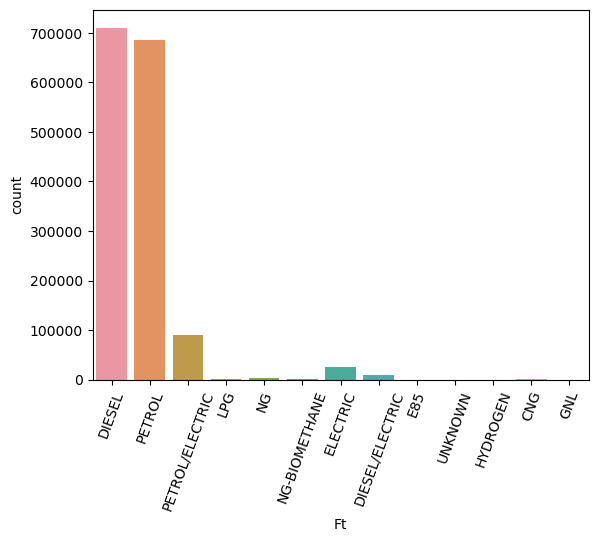

In [10]:
# Graphique des modes de carburant avant nettoyage des données => paragraphe 5.1.2
sns.countplot(df['Ft'])
plt.xticks(rotation= 70);

In [11]:
print('Nouvelles dimensions dataset : ', df.shape)

Nouvelles dimensions dataset :  (1529805, 20)


# 3.2 Gestion des valeurs manquantes

<AxesSubplot:>

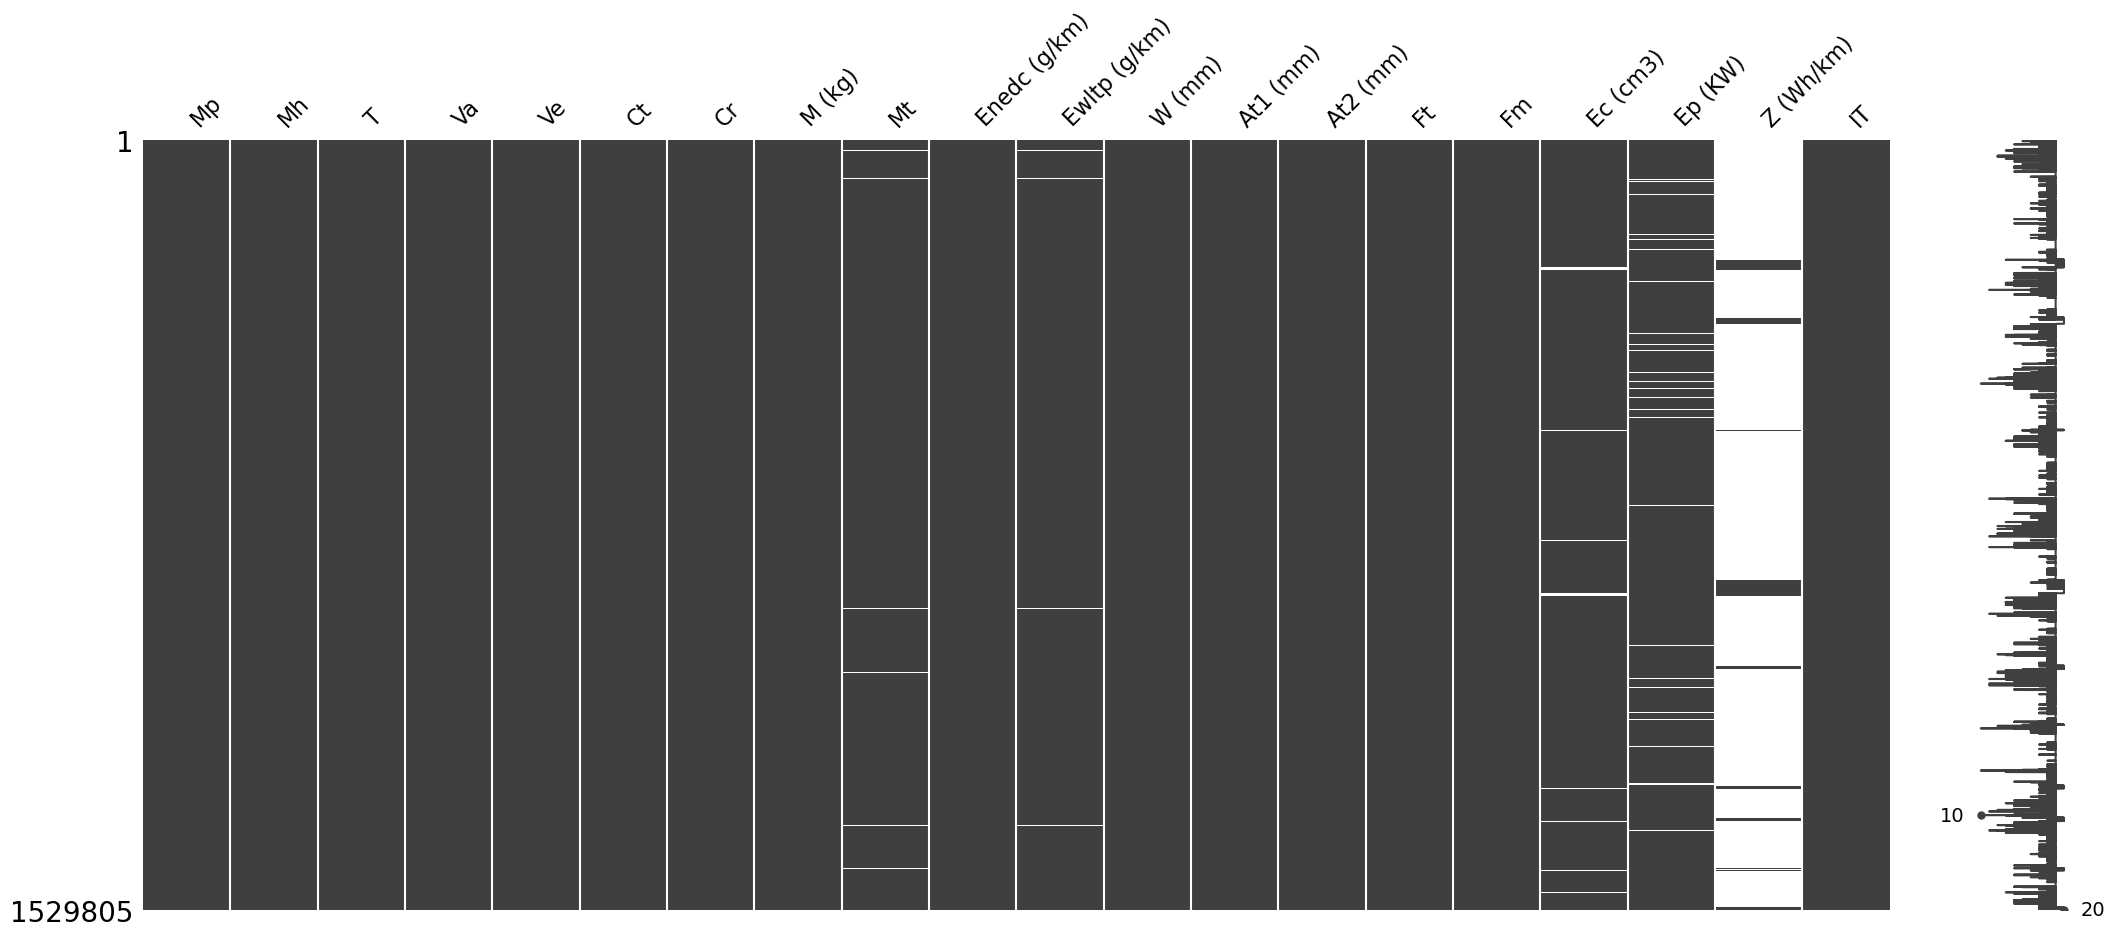

In [12]:
msno.matrix(df)

In [13]:
# Classement des variables selon leur taux de NaN
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_analyse_nan = df.isnull().sum(axis = 0)/df.shape[0]
df_analyse_nan.sort_values(ascending=False)

Z (Wh/km)      0.936
Ep (KW)        0.044
Ec (cm3)       0.017
Mt             0.010
At2 (mm)       0.006
At1 (mm)       0.005
Ewltp (g/km)   0.005
W (mm)         0.004
Enedc (g/km)   0.002
M (kg)         0.000
Fm             0.000
Ft             0.000
Mp             0.000
Mh             0.000
Cr             0.000
Ct             0.000
Ve             0.000
Va             0.000
T              0.000
IT             0.000
dtype: float64

In [14]:
# Suppression des lignes où une variable (sauf 'Z (Wh/km)') ont une valeur manquante
df = df.dropna(axis=0, how='any', subset=['Enedc (g/km)','Ewltp (g/km)','W (mm)', 'At2 (mm)', 'At1 (mm)', 'Mt', 'Ec (cm3)', 
                                     'Ep (KW)','M (kg)'])
# Remplacement des valeurs manquantes de 'Z (Wh/km)' par des 0 
df[['Z (Wh/km)']] = df[['Z (Wh/km)']].fillna(0)

<AxesSubplot:>

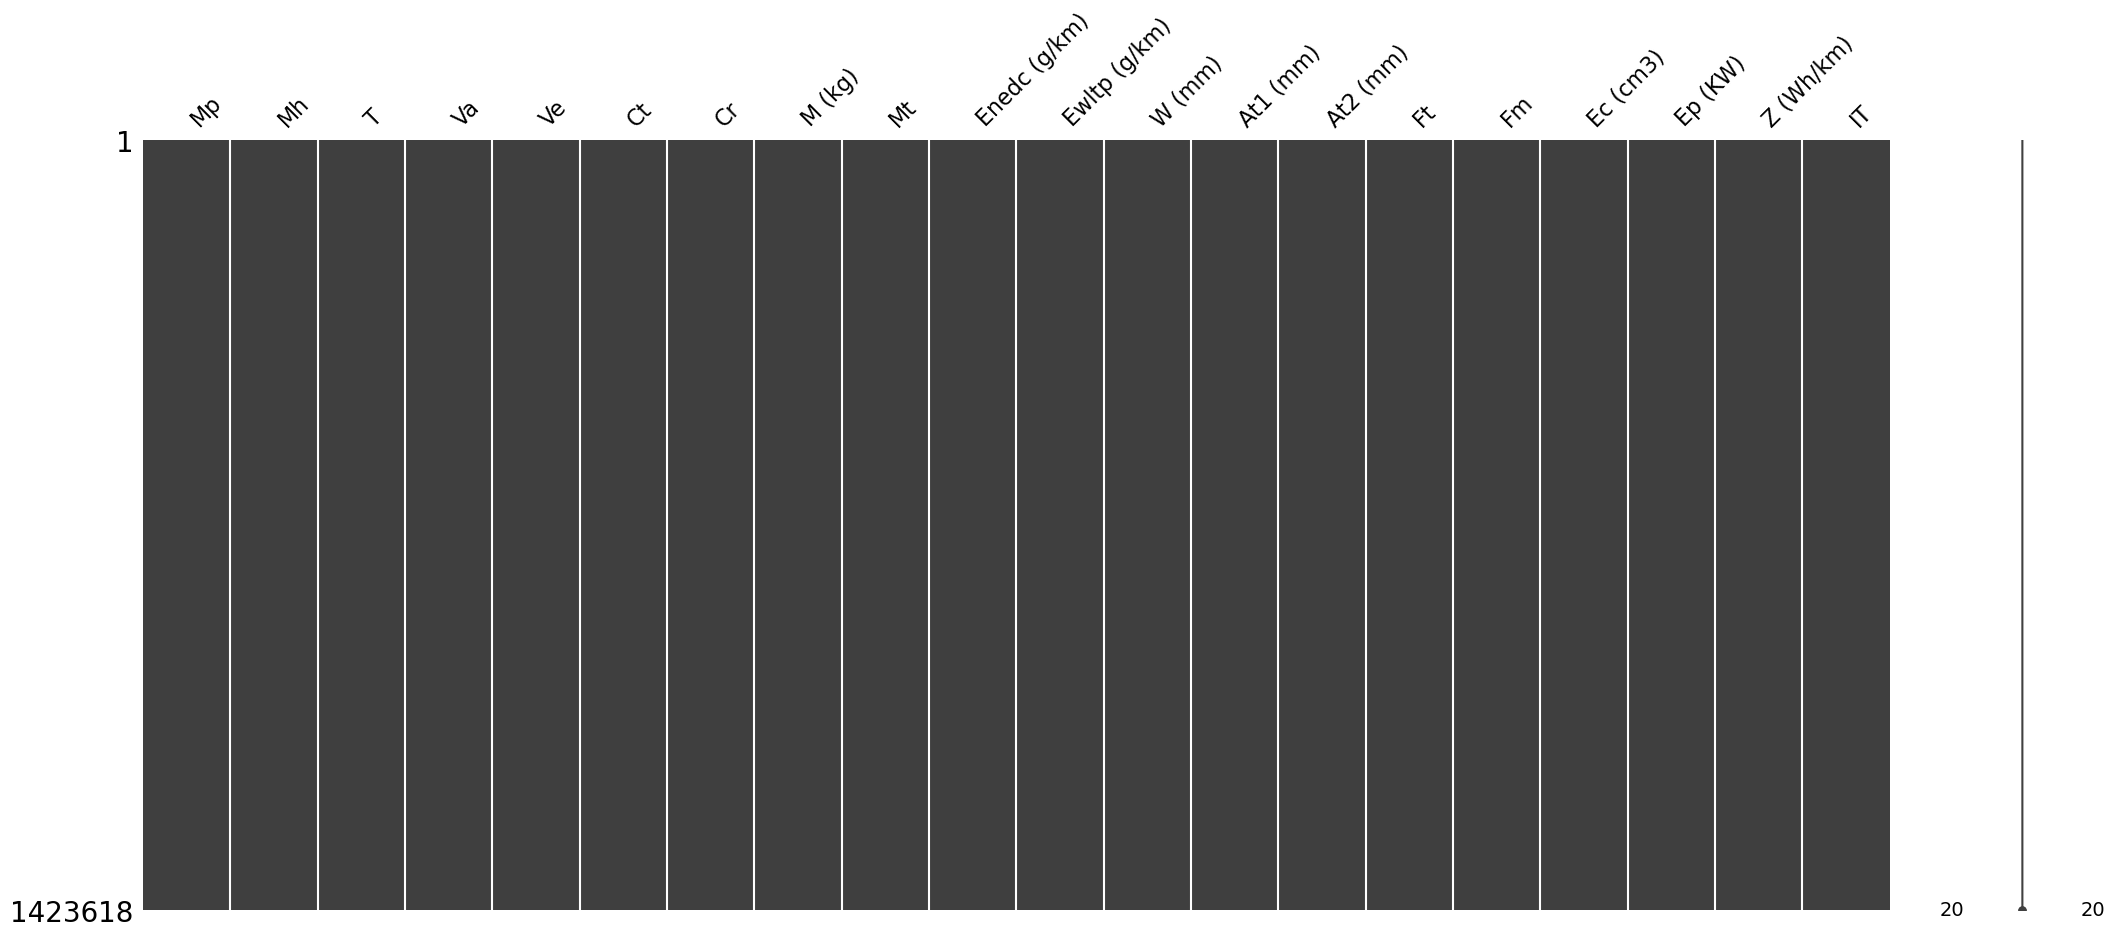

In [15]:
# Vérification visuelle du nettoyage
msno.matrix(df)

# 3.3 Preprocessing

In [16]:
# Suppression des variables qualitatives qui ont beaucoup de valeurs différentes : T, Va, Ve, IT
df = df.drop(columns=['T', 'Va', 'Ve', 'IT'], axis=1)

In [17]:
# Suppression des espaces dans les valeurs de type chaîne de caractères des variable qualitatives
# (En effet, pour la variable "Ct" par exemple : 
# 'M1', 'M1 ', ' M1  ' ne doivent pas être considérées comme trois valeurs distinctes.)
ocols = df.select_dtypes('object').columns
for ocol in ocols:
    df[ocol] = df[ocol].str.strip()

In [18]:
# Suppression des lignes où la valeur est une chaîne de caractères 'vide' (uniquement des espaces) 
# pour les variables catégorielles
print(f"Nombre de lignes avant traitement : {df.shape[0]}")
df = df.replace(r'^\s*$', np.nan, regex=True).dropna(subset=ocols)
print(f"Nombre de lignes après traitement : {df.shape[0]}")

Nombre de lignes avant traitement : 1423618
Nombre de lignes après traitement : 1386787


In [19]:
print('Nouvelles dimensions dataset : ', df.shape)

Nouvelles dimensions dataset :  (1386787, 16)


In [20]:
# Sauvegarde du dataframe "clean" afin de pouvoir le réutiliser dans les notebook suivants
df.to_csv('df_clean.csv',index_label='index')

In [21]:
# Vérification sauvegarde / chargement
df_verif = pd.read_csv('df_clean.csv', index_col='index')
print('Dimensions dataset chargé :', df_verif.shape)
df_verif.head()

Dimensions dataset chargé : (1386787, 16)


,Mp,Mh,Ct,Cr,M (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,Ec (cm3),Ep (KW),Z (Wh/km)
index,,,,,,,,,,,,,,,,
0,VW-SAIC,VOLKSWAGEN,M1,M1,1590.000,1718.000,105.000,135.000,2786.000,1564.000,1578.000,DIESEL,M,1968.000,110.000,0.000
1,VW-SAIC,VOLKSWAGEN,M1,M1,1590.000,1732.000,105.000,135.000,2786.000,1564.000,1578.000,DIESEL,M,1968.000,110.000,0.000
2,VW-SAIC,VOLKSWAGEN,M1,M1,1590.000,1745.000,105.000,135.000,2786.000,1564.000,1578.000,DIESEL,M,1968.000,110.000,0.000
3,VW-SAIC,VOLKSWAGEN,M1,M1,1590.000,1737.000,105.000,135.000,2786.000,1564.000,1578.000,DIESEL,M,1968.000,110.000,0.000
4,VW-SAIC,VOLKSWAGEN,M1,M1,1590.000,1723.000,105.000,135.000,2786.000,1564.000,1578.000,DIESEL,M,1968.000,110.000,0.000


# 4. Variables cibles

# 4.1 Lien entre les deux variables cibles

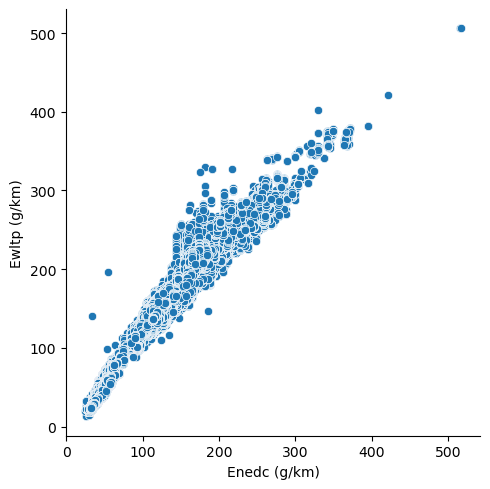

In [22]:
sns.relplot(x='Enedc (g/km)',y='Ewltp (g/km)',data=df);

In [23]:
x=(df['Ewltp (g/km)'].mean()-df['Enedc (g/km)'].mean())/df['Ewltp (g/km)'].mean() *100
print('Le nouveau test Ewltp donne un CO2 plus elevé de', int(x), '% par rapport au test Enedc')

Le nouveau test Ewltp donne un CO2 plus elevé de 17 % par rapport au test Enedc


# 4.2 Zoom sur la réduction d'émission de CO2

In [24]:
# Sélection des lignes avec une réduction significative
df1 = df1.loc[df1['Erwltp (g/km)']>0.5]

In [25]:
moyenne_wltp = df1['Ewltp (g/km)'].mean()
moyenne_reduc_wltp  = df1['Erwltp (g/km)'].mean()
moyenne_nedc = df1['Enedc (g/km)'].mean()
moyenne_reduc_nedc  = df1['Ernedc (g/km)'].mean()

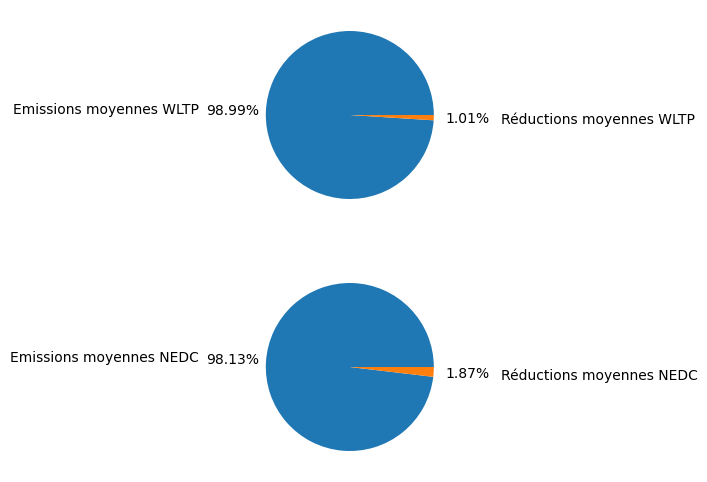

In [26]:
fig=plt.figure(figsize=(6,6))
plt.subplot(211)
plt.pie([moyenne_wltp,moyenne_reduc_wltp], labels = ['Emissions moyennes WLTP','Réductions moyennes WLTP'],
        autopct = lambda x: str(round(x,2))+'%', pctdistance=1.4, labeldistance=1.8);
plt.subplot(212)
plt.pie([moyenne_nedc,moyenne_reduc_nedc], labels = ['Emissions moyennes NEDC', 'Réductions moyennes NEDC'],
        autopct = lambda x: str(round(x,2))+'%', pctdistance=1.4, labeldistance=1.8);

# 5 – Visualisations et statistiques

# 5.1 Variables qualitatives

In [27]:
#liste des variables qualitatives
list=df.select_dtypes(include=['object']).columns
print(list)
#Dans un dataset, nous plaçons uniquement les variables qualitatives.
cat_data= df.select_dtypes(include='O')
cat_data.head(5)

Index(['Mp', 'Mh', 'Ct', 'Cr', 'Ft', 'Fm'], dtype='object')


,Mp,Mh,Ct,Cr,Ft,Fm
0,VW-SAIC,VOLKSWAGEN,M1,M1,DIESEL,M
1,VW-SAIC,VOLKSWAGEN,M1,M1,DIESEL,M
2,VW-SAIC,VOLKSWAGEN,M1,M1,DIESEL,M
3,VW-SAIC,VOLKSWAGEN,M1,M1,DIESEL,M
4,VW-SAIC,VOLKSWAGEN,M1,M1,DIESEL,M


In [28]:
# Analyse des variables catégorielles:
print('Mp : Groupement constructeurs')
print(cat_data['Mp'].value_counts())
print('Mh: Constructeur')
print(cat_data['Mh'].value_counts())
print('Ct : Catégorie du véhicule réceptionné')
print(cat_data['Ct'].value_counts())
print('Cr: Catégorie du véhicule immatriculé')
print(cat_data['Cr'].value_counts())  
print('Ft: Type de carburant')
print(cat_data['Ft'].value_counts()) 
print('Fm: Mode de carburation')
print(cat_data['Fm'].value_counts()) 

Mp : Groupement constructeurs
VW-SAIC                      603216
BMW                          216861
MERCEDES-BENZ                197106
FORD-VOLVO                   149294
PSA-OPEL                     111160
FCA                           36754
RENAULT-NISSAN-MITSUBISHI     35843
TOYOTA-MAZDA                  14407
KIA                           12119
HYUNDAI                        9134
SUZUKI                          893
Name: Mp, dtype: int64
Mh: Constructeur
BMW AG                           213171
VOLKSWAGEN                       207864
MERCEDES-BENZ AG                 195002
AUDI AG                          173523
SKODA                            140645
FORD WERKE GMBH                   87835
VOLVO                             59008
SEAT                              51098
OPEL AUTOMOBILE                   35042
PSA                               34099
RENAULT                           27706
AUTOMOBILES PEUGEOT               27162
PORSCHE                           23394
FIAT GROUP    

# 5.1.1 - Etude de l'emission de CO2 suivant la marque des véhicules

In [29]:
df['Mh'].value_counts(normalize=False, ascending=False)[df['Mh'].value_counts()>100000]

BMW AG              213171
VOLKSWAGEN          207864
MERCEDES-BENZ AG    195002
AUDI AG             173523
SKODA               140645
Name: Mh, dtype: int64

In [30]:
df['Mh'].value_counts(normalize=False, ascending=False)[df['Mh'].value_counts()<10]

SUZUKI THAILAND           6
SAIC MOTOR CORPORATION    4
FORD MOTOR AUSTRALIA      2
BUGATTI                   2
LEVC                      1
Name: Mh, dtype: int64

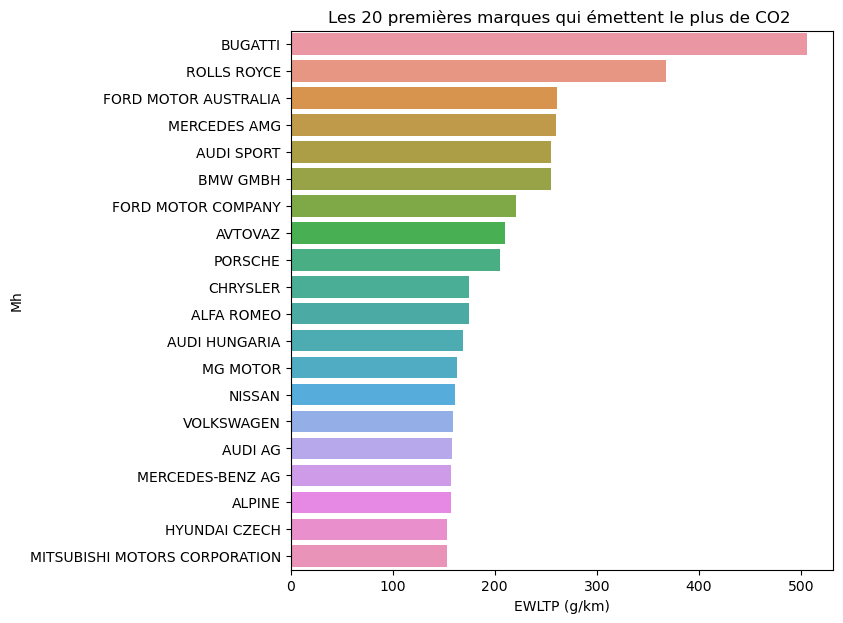

In [31]:
plt.figure(figsize=(7,7))

indx = df.groupby('Mh').mean()['Ewltp (g/km)'].sort_values(ascending = False).head(20).index
val = df.groupby('Mh').mean()['Ewltp (g/km)'].sort_values(ascending = False).head(20).values
plt.title('Les 20 premières marques qui émettent le plus de CO2 ')
sns.barplot(y = indx.astype(str), x = val);
plt.xlabel('EWLTP (g/km)');

#  5.1.2 Etude de l'émission de CO2 suivant le type de carburation

In [32]:
l=df.Ft.unique()
print('il y a ',len(l), 'type de Fuel differents dans ce dataset' )

il y a  9 type de Fuel differents dans ce dataset


C:\Users\aupee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


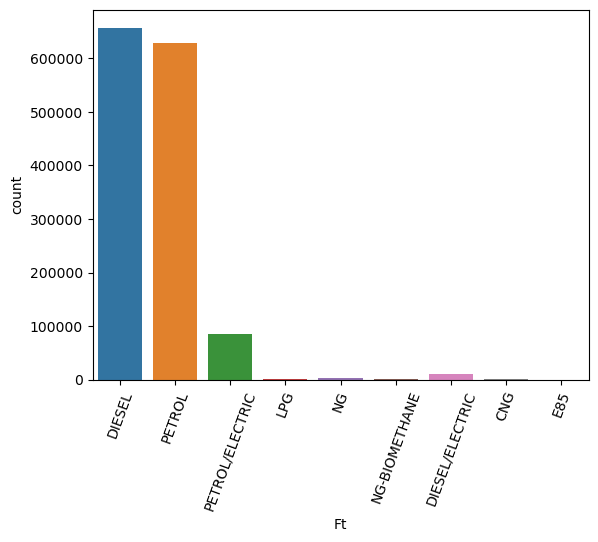

In [33]:
sns.countplot(df['Ft'])
plt.xticks(rotation= 70);

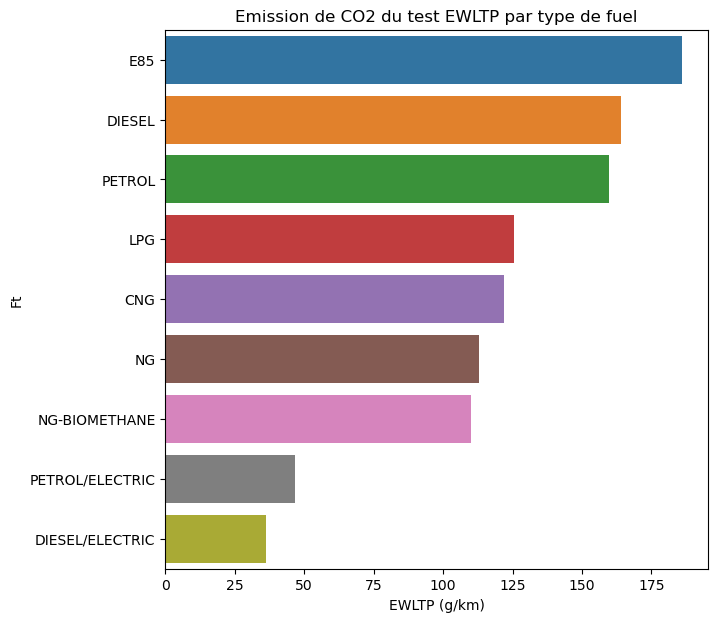

In [34]:
plt.figure(figsize=(7,7))
indxf = df.groupby('Ft').mean()['Ewltp (g/km)'].sort_values(ascending = False).index
valf = df.groupby('Ft').mean()['Ewltp (g/km)'].sort_values(ascending = False).values
plt.title('Emission de CO2 du test EWLTP par type de fuel')
sns.barplot(y = indxf.astype(str), x = valf);
plt.xlabel('EWLTP (g/km)');

#  5.2 variables quantitatives 

# 5.2.1 Heatmap de corrélation de variables

In [35]:
# Fonction affichant la heatmap
def print_heatmap_features(data_corr:pd.DataFrame, figsize:(int,int)=None):
    style.use('ggplot')
    sns.set_style('whitegrid')
    if figsize is not None:
        plt.subplots(figsize = figsize)
    else:
        plt.subplots(figsize = (60, 36))

    mask = np.zeros_like(data_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(data_corr, cmap=sns.diverging_palette(20, 250, n=8), annot=True, mask=mask, center = 0)
    plt.title("Heatmap de corrélation des variables", fontsize = 14);

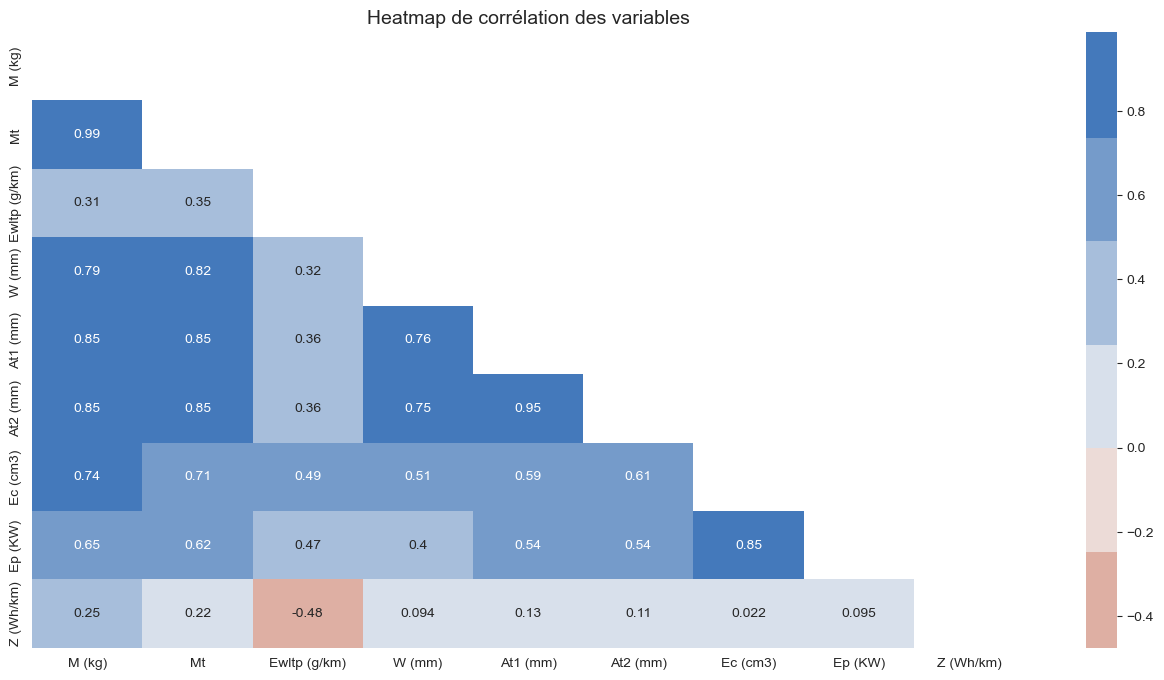

In [36]:
print_heatmap_features(df.drop(columns=['Enedc (g/km)']).corr(), (16, 8))

# 5.2.2 Étude de la variable cible

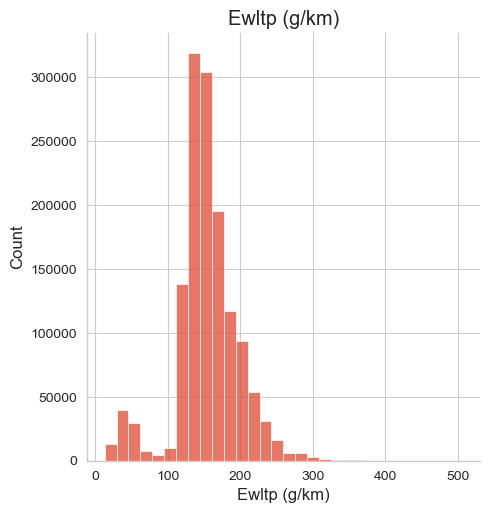

In [37]:
sns.displot(df["Ewltp (g/km)"], bins=30)
plt.title("Ewltp (g/km)")
plt.show()

In [38]:
print(df["Ewltp (g/km)"].mode())

0   137.000
Name: Ewltp (g/km), dtype: float64


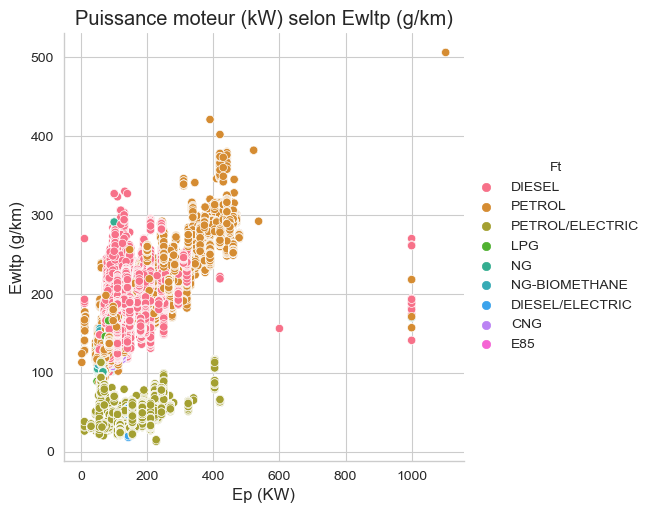

In [39]:
sns.relplot(x='Ep (KW)',y='Ewltp (g/km)',hue= 'Ft', data=df);
plt.title("Puissance moteur (kW) selon Ewltp (g/km)")
plt.show()

# 5.2.3 Masse et dimensions

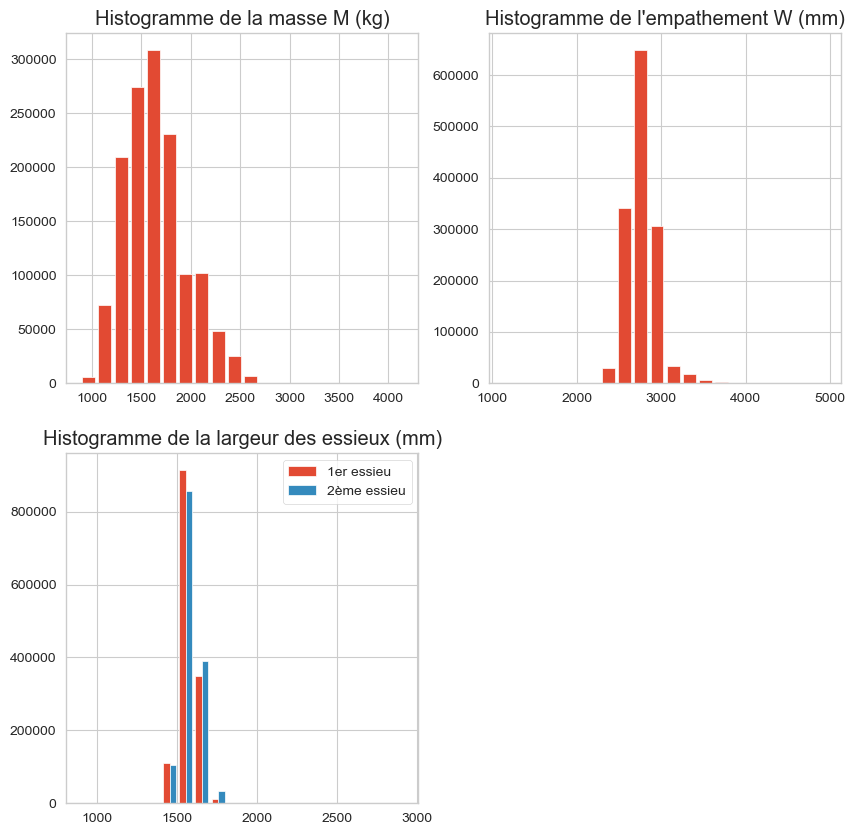

In [40]:
fig=plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(df["M (kg)"], bins=20,rwidth=0.8)
plt.title('Histogramme de la masse M (kg)');
#sns.displot(df["M (kg)"], kind='ecdf');
#sns.displot(df["M (kg)"], bins=20,kde=True,rug=True,color='red'); #pas une bonne idée

plt.subplot(222)
plt.hist(df["W (mm)"], bins=20, rwidth=0.8)
plt.title("Histogramme de l'empathement W (mm)");
plt.subplot(223)
plt.hist([df["At1 (mm)"],df["At2 (mm)"]], bins=20, rwidth = 0.8, label=['1er essieu', '2ème essieu'])
plt.title("Histogramme de la largeur des essieux (mm)")
plt.legend()

plt.show()

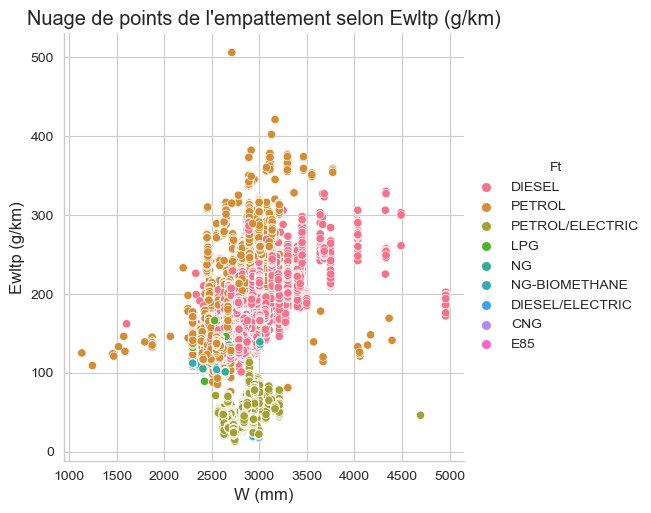

In [41]:
sns.relplot(x='W (mm)',y='Ewltp (g/km)',hue= 'Ft',data=df);
plt.title("Nuage de points de l'empattement selon Ewltp (g/km)")
plt.show()

In [42]:
print(df["M (kg)"].mode())
print(df["W (mm)"].mode())
print(df["At1 (mm)"].mode())
print(df["At2 (mm)"].mode())

0   1395.000
Name: M (kg), dtype: float64
0   2670.000
Name: W (mm), dtype: float64
0   1561.000
Name: At1 (mm), dtype: float64
0   1562.000
Name: At2 (mm), dtype: float64


In [43]:
df[["M (kg)","W (mm)","At1 (mm)","At2 (mm)"]].describe()

,M (kg),W (mm),At1 (mm),At2 (mm)
count,1386787.000,1386787.000,1386787.000,1386787.000
mean,1641.334,2767.834,1578.154,1581.308
std,311.506,177.116,53.012,56.781
min,885.000,1134.000,930.000,900.000
25%,1395.000,2647.000,1548.000,1547.000
50%,1605.000,2730.000,1573.000,1575.000
75%,1820.000,2864.000,1610.000,1618.000
max,4160.000,4959.000,2920.000,2920.000


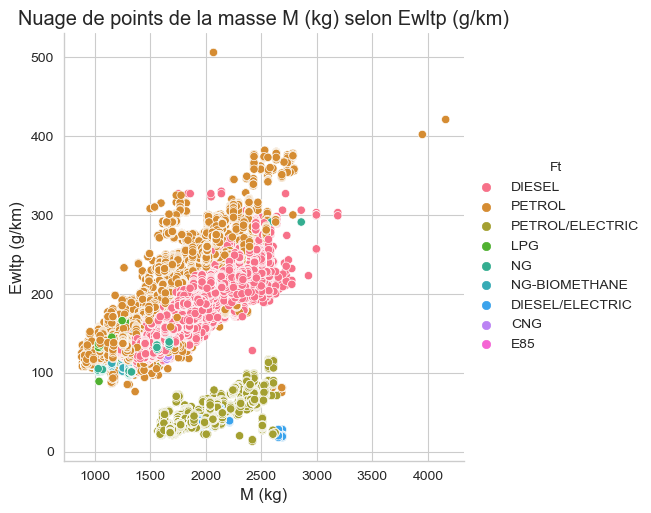

In [44]:
sns.relplot(x='M (kg)',y='Ewltp (g/km)',hue= 'Ft', data=df);
plt.title("Nuage de points de la masse M (kg) selon Ewltp (g/km)")
plt.show()

# 5.2.4 Cylindrée et puissance du moteur

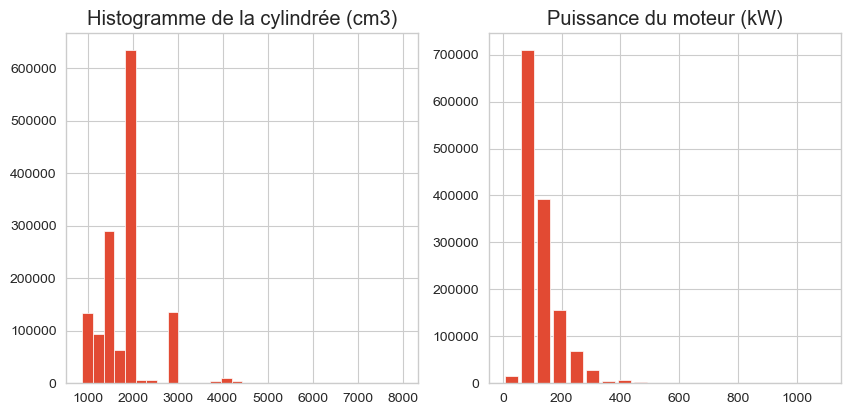

In [45]:
fig=plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(df["Ec (cm3)"], bins=30, )
plt.title("Histogramme de la cylindrée (cm3)")
plt.subplot(222)
plt.hist(df["Ep (KW)"], bins=20,rwidth=0.8)
plt.title("Puissance du moteur (kW)")
plt.show()

In [46]:
print(df["Ec (cm3)"].mode())
print(df["Ep (KW)"].mode())

0   1968.000
Name: Ec (cm3), dtype: float64
0   110.000
Name: Ep (KW), dtype: float64


In [47]:
df[["Ec (cm3)","Ep (KW)"]].describe()

,Ec (cm3),Ep (KW)
count,1386787.000,1386787.000
mean,1848.938,133.276
std,584.972,58.631
min,875.000,2.000
25%,1498.000,96.000
50%,1968.000,110.000
75%,1991.000,143.000
max,7993.000,1103.000


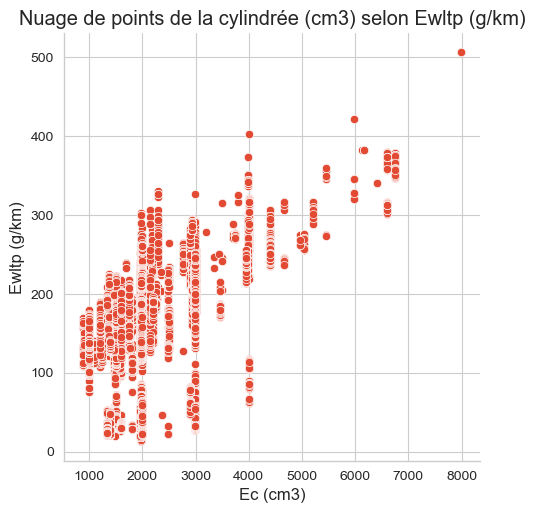

In [48]:
sns.relplot(x='Ec (cm3)',y='Ewltp (g/km)',data=df);
plt.title("Nuage de points de la cylindrée (cm3) selon Ewltp (g/km)")
plt.show()

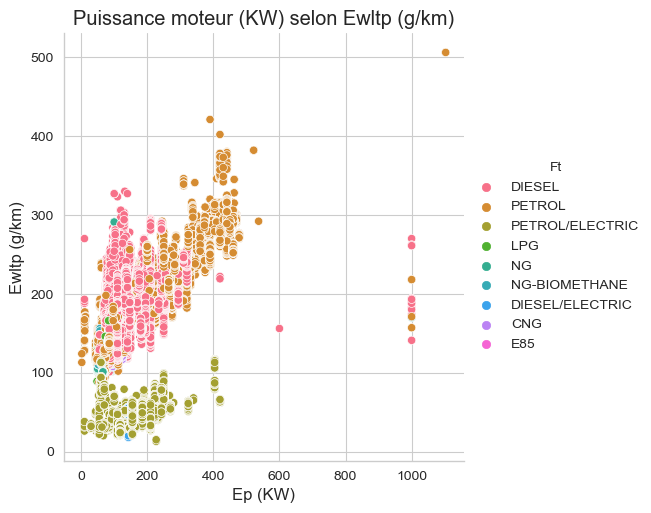

In [49]:
sns.relplot(x='Ep (KW)',y='Ewltp (g/km)',hue= 'Ft',data=df);
plt.title("Puissance moteur (KW) selon Ewltp (g/km)")
plt.show()

# 5.2.5 Étude des outliers

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:20,.3f}'.format

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
M (kg),"1,386,787.000","1,641.334",311.506,885.000,"1,395.000","1,605.000","1,820.000","4,160.000"
Mt,"1,386,787.000","1,802.725",344.636,887.000,"1,546.000","1,753.000","1,990.000","4,760.000"
Enedc (g/km),"1,386,787.000",127.252,36.368,24.000,110.000,124.000,146.000,517.000
Ewltp (g/km),"1,386,787.000",153.750,43.776,13.000,134.000,151.000,175.000,506.000
W (mm),"1,386,787.000","2,767.834",177.116,"1,134.000","2,647.000","2,730.000","2,864.000","4,959.000"
At1 (mm),"1,386,787.000","1,578.154",53.012,930.000,"1,548.000","1,573.000","1,610.000","2,920.000"
At2 (mm),"1,386,787.000","1,581.308",56.781,900.000,"1,547.000","1,575.000","1,618.000","2,920.000"
Ec (cm3),"1,386,787.000","1,848.938",584.972,875.000,"1,498.000","1,968.000","1,991.000","7,993.000"
Ep (KW),"1,386,787.000",133.276,58.631,2.000,96.000,110.000,143.000,"1,103.000"
Z (Wh/km),"1,386,787.000",11.368,58.522,0.000,0.000,0.000,0.000,"1,754.000"


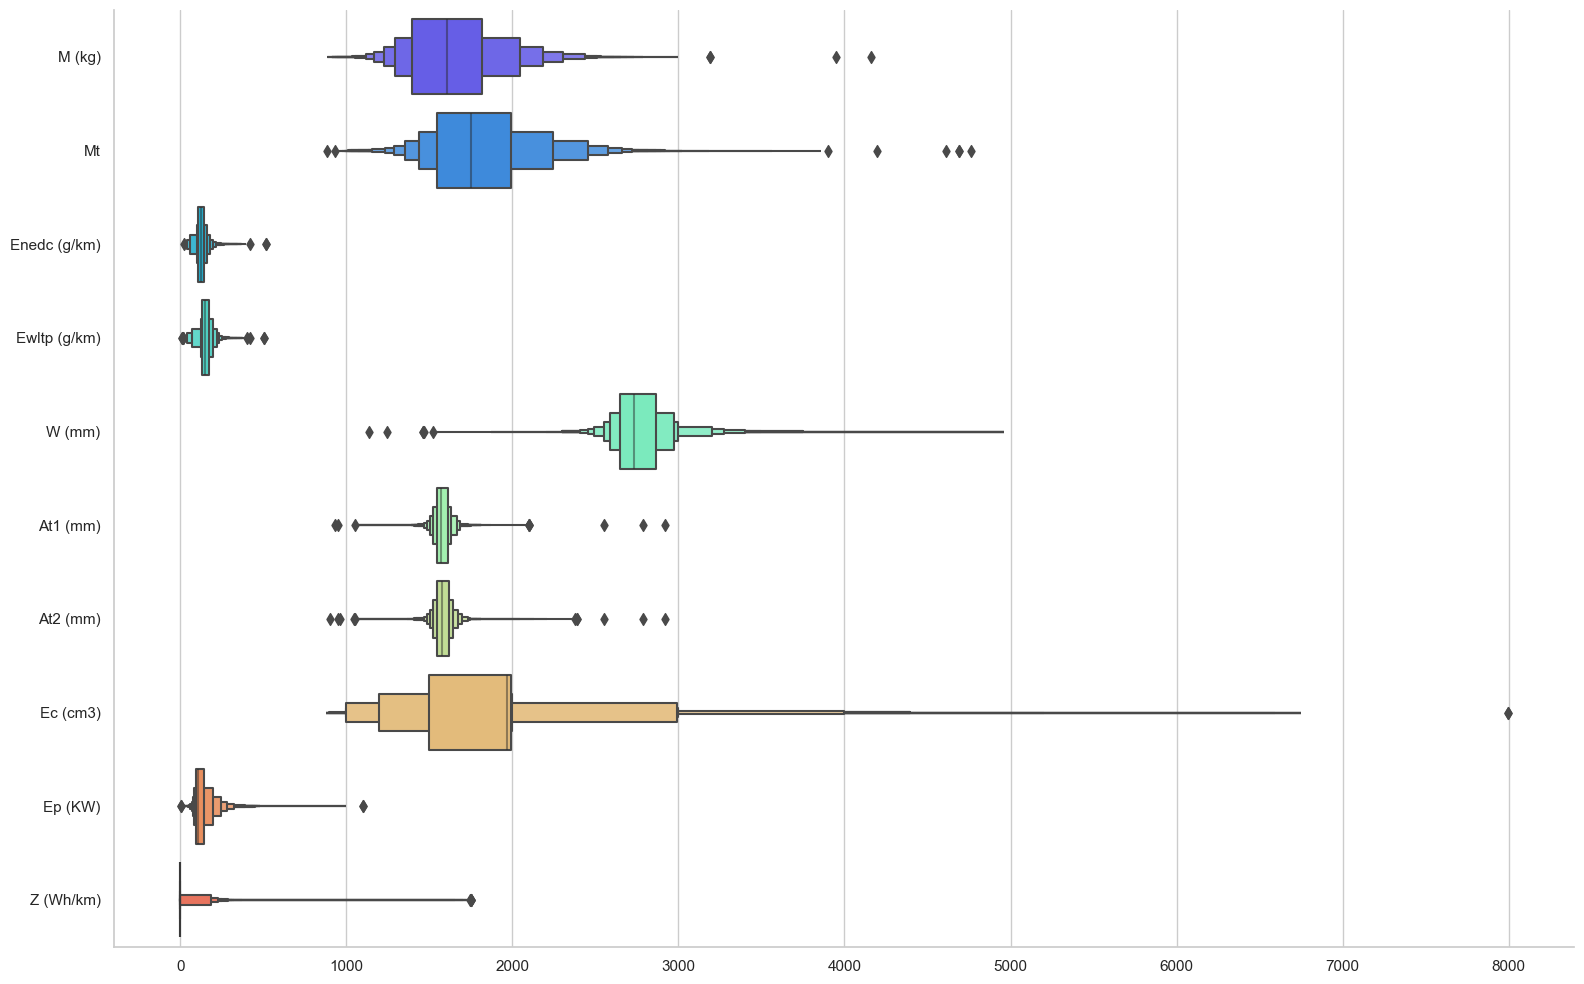

In [52]:
sns.set_theme()
sns.set_style('whitegrid')
sns.catplot(data=df, kind='boxen', orient='h', color=df.index, palette='rainbow', height=10, aspect=1.6);